### PLOTTING & VISUALIZATION 

PDF, SVG, JPG, PNG, BMP, GIF, etc.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

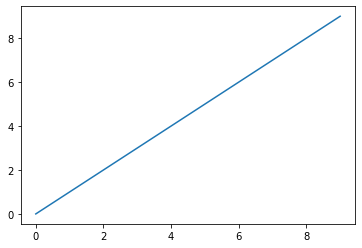

In [3]:
plt.plot(data)

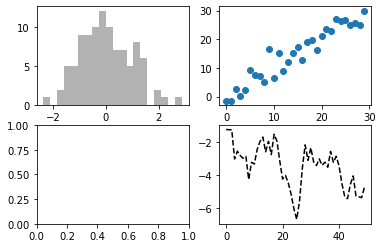

In [4]:
## Figures & subplots

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# adding this command below will plot in the last subplot fig.
plt.plot(np.random.randn(50).cumsum(), 'k--')

# plotting other sub figures
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

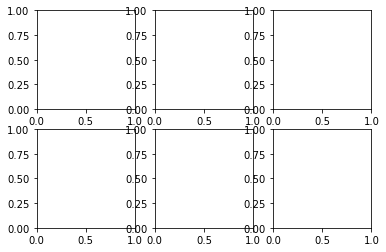

In [5]:
# Convenient method to create a grid of subplots
fig, axes = plt.subplots(2, 3)

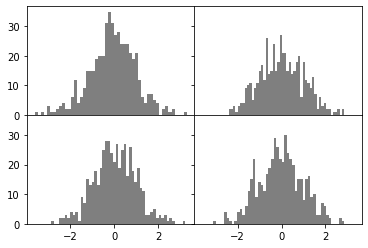

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

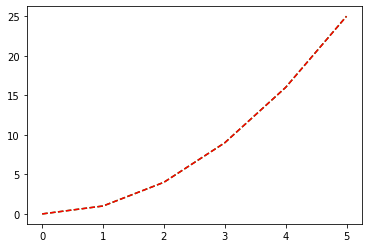

In [7]:
# Colors, Makers & Line Styles

x = np.arange(6)
y = x**2

plt.plot(x,y, 'g--')
plt.plot(x, y, linestyle='--', color='r')


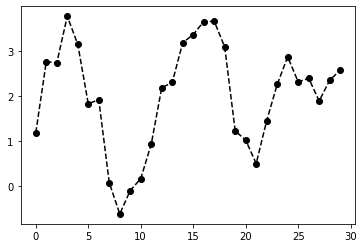

In [8]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

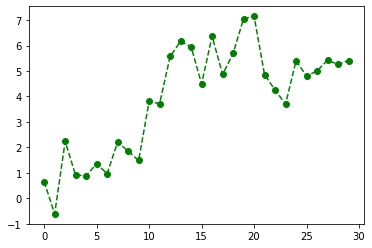

In [9]:
# more explicitly can be written as
plt.plot(randn(30).cumsum(), color='g', linestyle='dashed', marker='o')

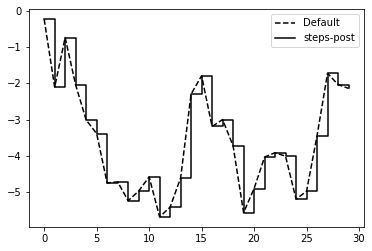

In [10]:
# Drawstyle options
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
#plt.xlim([0, 10])
plt.legend(loc='best')

Text(0.5, 0, 'Stages')

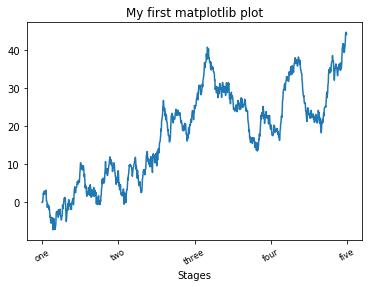

In [11]:
# Setting titles, axis labels, & ticklabels
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

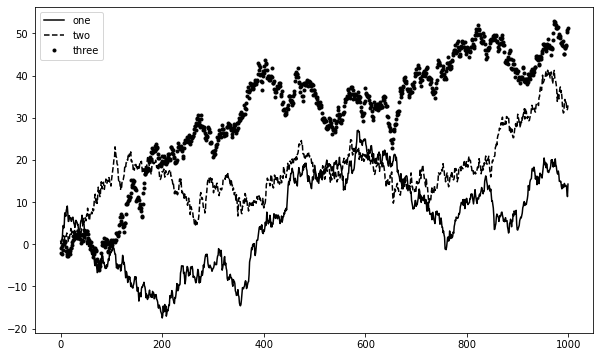

In [12]:
# Adding legends

from numpy.random import randn
fig = plt.figure(figsize=(10,6))   # set fig size inside plt.figure() function
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')  # loc tells where to plot

(600.0, 1800.0)

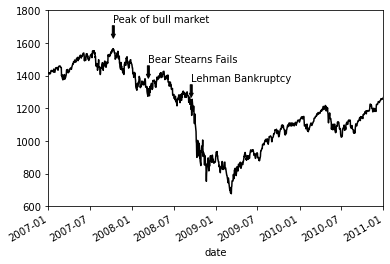

In [29]:
# Annotations & Drawing on subplot
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
data
spx = data['close']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
# ax.set_title('Important dates in the 2008-2009 financial crisis')

In [31]:
data = pd.read_csv('spx.csv')
data.head()

,date,close
0,02-Jan-86,209.59
1,03-Jan-86,210.88
2,06-Jan-86,210.65
3,07-Jan-86,213.80
4,08-Jan-86,207.97


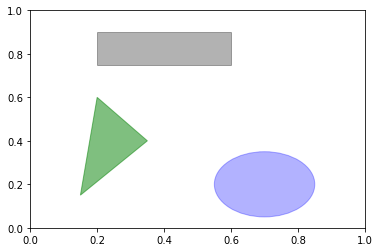

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k' , alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b' , alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                    color='g' , alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
# Saving plot to file
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

# Saving plots to file
plt.savefig('figpath.svg')   # save vector images

In [39]:
# savefig doesn’t have to write to disk; it can also write to any file-like object, such as a BytesIO

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

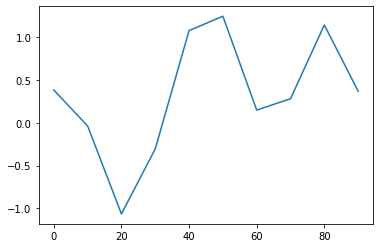

In [53]:
## Plotting with Pandas & Seaborn (Series.plot method)
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

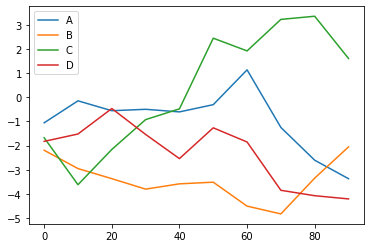

In [60]:
# DataFrame's plot method plot each of its column as a diffrent line on the same subplot
df = pd.DataFrame(np.random.randn(10, 4). cumsum(0),
                   columns=['A' , 'B' , 'C' , 'D' ],
                   index=np. arange(0, 100, 10))
df.plot()

<AxesSubplot:>

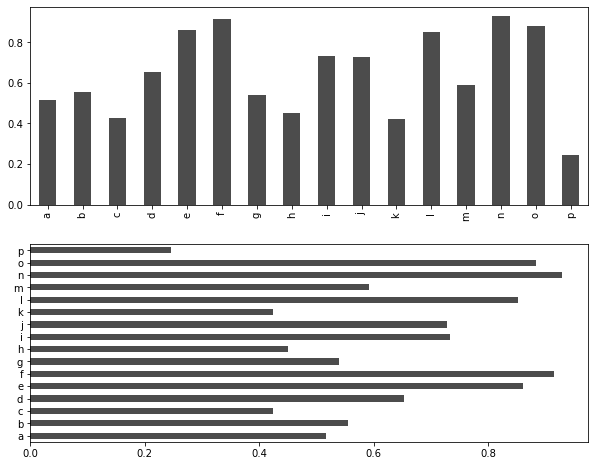

In [73]:
# Bar plots
fig, axes = plt.subplots(2, 1, figsize=(10,8))
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k' , alpha=0.7)
data.plot.barh(ax=axes[1], color='k' , alpha=0.7)

In [75]:
df = pd.DataFrame(np.random.rand(6, 4),
                   index=['one' , 'two' , 'three' , 'four' , 'five' , 'six' ],
                   columns=pd.Index(['A' , 'B' , 'C' , 'D' ], name='Genus' ))
df

Genus,A,B,C,D
one,0.918979,0.588408,0.272198,0.947690
two,0.996482,0.583289,0.855206,0.923700
three,0.303115,0.906201,0.756289,0.604213
four,0.651394,0.390496,0.448220,0.892899
five,0.070233,0.750265,0.255745,0.148119
six,0.446064,0.654672,0.749320,0.443710


<AxesSubplot:>

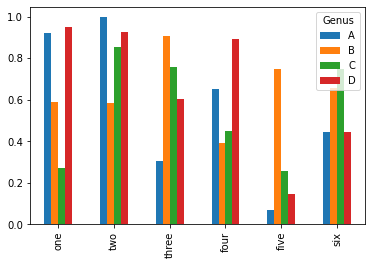

In [76]:
df.plot.bar()

<AxesSubplot:>

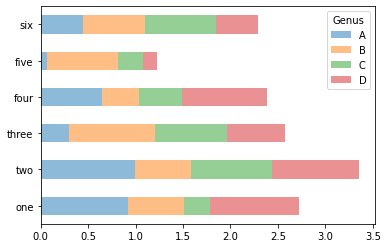

In [81]:
df.plot.barh(stacked=True, alpha=0.5)

In [101]:
import seaborn as sns
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [106]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [107]:
# tipping percentage by day with error bars
tips['tip_pct' ] = tips['tip' ] / (tips['total_bill' ] - tips['tip' ])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

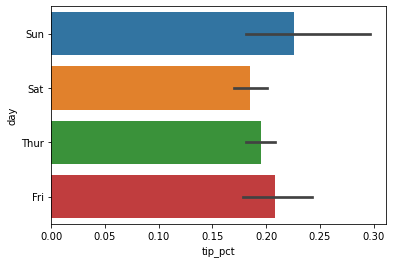

In [105]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

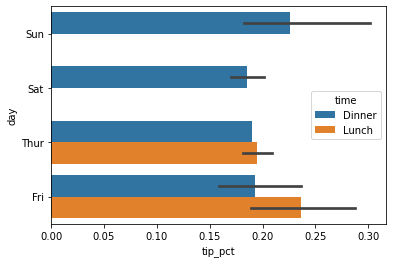

In [110]:
# sns.barplot has an hue option that enables us to split by categorical value
# tipping percentage by day & time
sns.barplot(x='tip_pct' , y='day' , hue='time' , data=tips, orient='h' )

<AxesSubplot:ylabel='Frequency'>

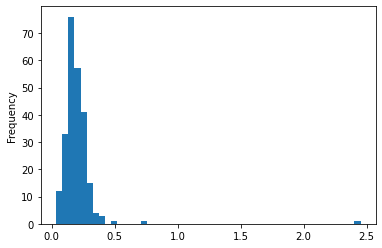

In [112]:
# Histogram & Density plots
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

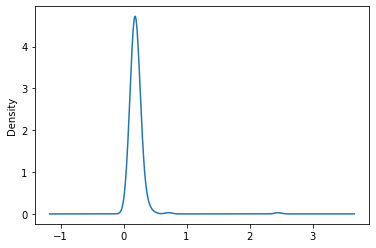

In [114]:
# Desity plot by tip percentage
tips['tip_pct' ].plot.density()

C:\Users\SAU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

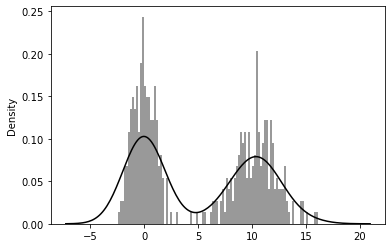

In [116]:
# Distplot - plot both histogram & continuous density estimate simultaneously

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k' )

In [119]:
# Scatter or point plots
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
#data
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


C:\Users\SAU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

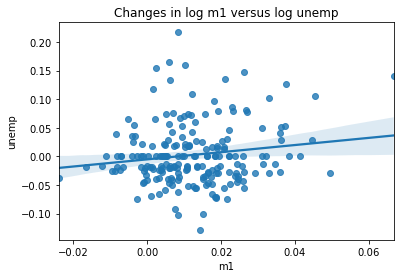

In [121]:
sns.regplot('m1' , 'unemp' , data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

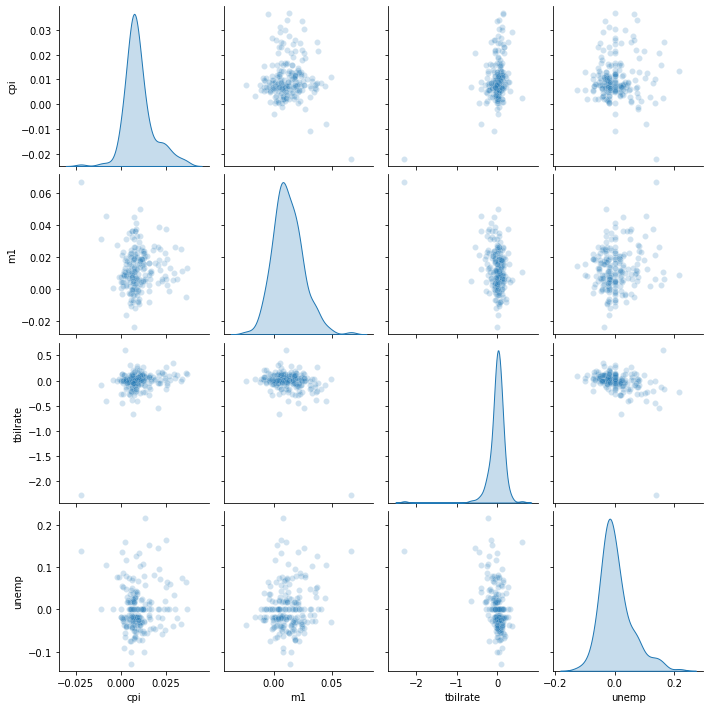

In [122]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

C:\Users\SAU\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


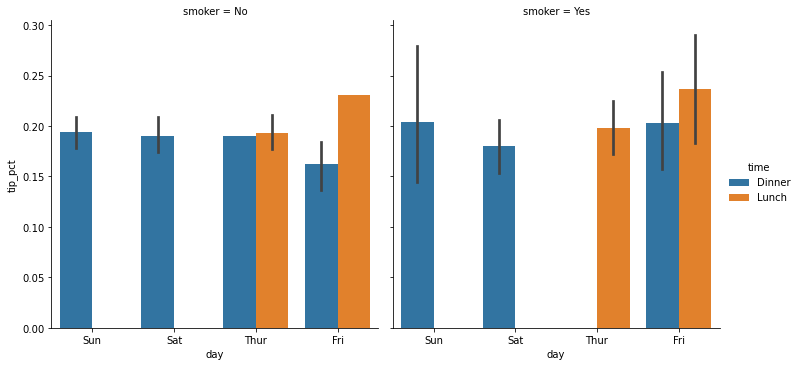

In [124]:
# Facet grids & Categorical data
sns.factorplot(x='day' , y='tip_pct' , hue='time' , col='smoker' ,
                kind='bar' , data=tips[tips.tip_pct < 1])

C:\Users\SAU\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


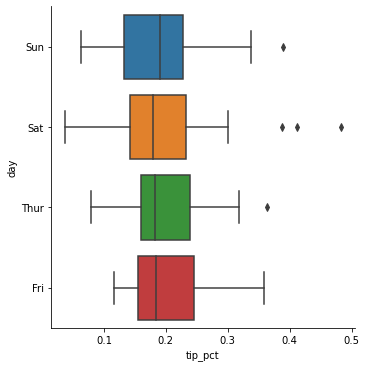

In [125]:
# Box plot
sns.factorplot(x='tip_pct' , y='day' , kind='box' ,
                data=tips[tips.tip_pct < 0.5])